## **DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS**

Business Requirement

KPI's Requirements:
1. Total Sales: The overall revenue generated from all items sold.
2. Average Sales: The average revenue per sales.
3. Number of items: The total count of different items sold.
4. Average Rating: The average customer rating for items sold.

Chart's Requirements:
1. Total Sales by Fat Content:
  Objective: Analysze the impact of fat content on total sales.
  Additional KPI Metrics: Assess how other KPIs (Average Sales, Number of Items, Average Rating) vary with fat content
  Chart Donut Chart.
2. Total Sales by Item Type:
  Objective: Identify the performance of different item types in terms of total sales.
  Additional KPI Metrics: Assess how other KPIs
  Chart Type: Bar Chart.
3. Fat Content by Outlet for Total Sales:
  Objective: Compare total sales across different outlets segmented by fat content.
  Additional KPI Metrics: Assess how other KPIs
  Chart Type: Stacked Column Chart.
4. Total Sales by Outlet Establishment:
  Objective: Evaluate how the age or type of outlet establishment influences total sales.
  Chart Type: Line Chart.
5. Sales by Outlet Size:
  Ojective: Analyze the correlation between outlet size and total sales.
  Chart Type: Donut/ Pie Chart
6. Sales by Outlet Location:
  Objective: Assess the geographic distribution of sales acress different location.
  Chart Type: Funnel Map.

### **Import Libraries**



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Data**

In [48]:
df = pd.read_csv('/content/blinkit_data.csv')
# df.head()

### **Size of Data**

In [49]:
print("Size of Data:", df.shape)

Size of Data: (8523, 12)


### **Columns Name Renaming**

In [50]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
# df.head()

### **Field Data Type**

In [51]:
df.dtypes

,0
item_fat_content,object
item_identifier,object
item_type,object
outlet_establishment_year,int64
outlet_identifier,object
outlet_location_type,object
outlet_size,object
outlet_type,object
item_visibility,float64
item_weight,float64


### **Data Cleaning**

In [52]:
print(df['item_fat_content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [53]:
df['item_fat_content'] = df['item_fat_content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
print(df['item_fat_content'].unique())

['Regular' 'Low Fat']


### **Business Requirements**

### **KPI's Requirements**

In [54]:
#Total Sales
total_sales = df['sales'].sum()
print("Total Sales:", total_sales)

#Average Sales
avg_sales = df['sales'].mean()
print("Average Sales:", avg_sales)

#Number of Items
no_of_items_sold = df['sales'].count()
print("Number of Items:", no_of_items_sold)

#Average Rating
avg_ratings = df['rating'].mean()
print("Average Ratings:", avg_ratings)

Total Sales: 1201681.4808
Average Sales: 140.9927819781767
Number of Items: 8523
Average Ratings: 3.965857092573038


### **Chart's Requirements**

### **Total Sales by Fat Content**

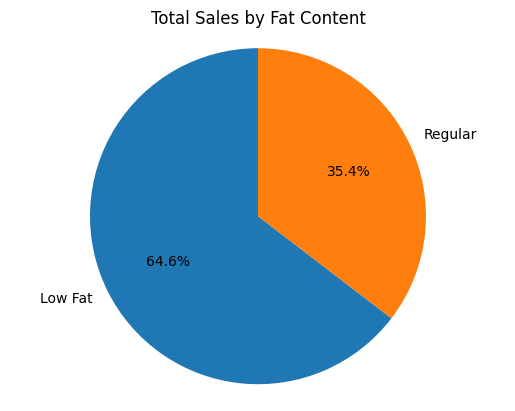

In [55]:
sales_by_fat = df.groupby('item_fat_content')['sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Total Sales by Fat Content')
plt.axis('equal')
plt.show()

### **Total Sales by Item Type**

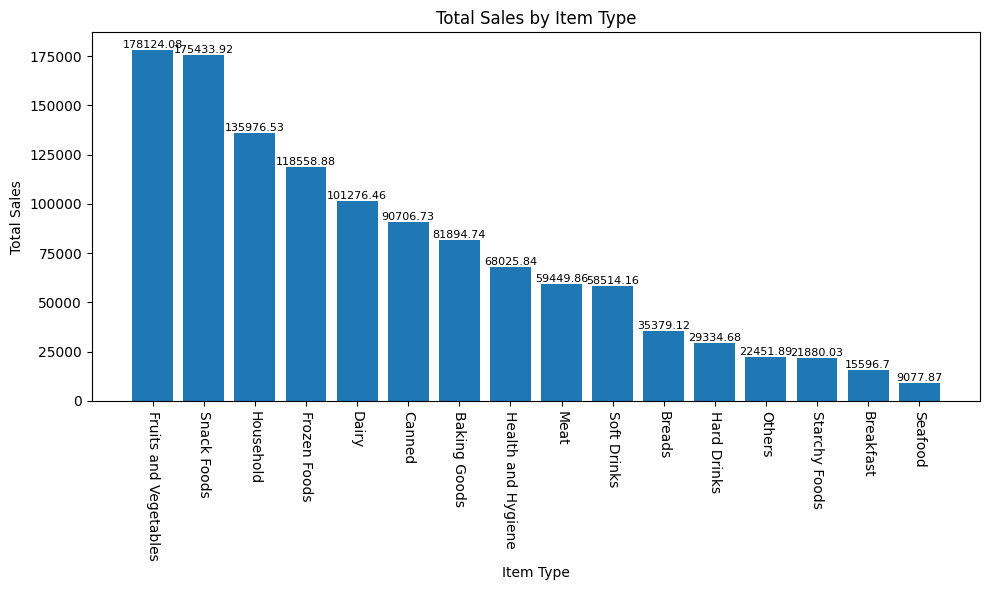

In [57]:
sales_by_type = df.groupby('item_type')['sales'].sum().sort_values(ascending = False)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(round(bar.get_height(), 2)), ha='center', va='bottom', fontsize = 8)

plt.tight_layout()
plt.show()

### **Fat Content by Outlet for Total Sales**

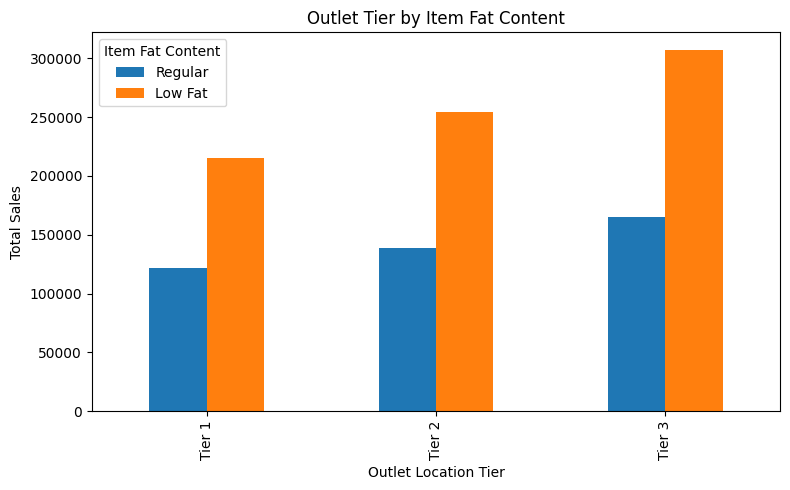

In [58]:
grouped = df.groupby(['outlet_location_type', 'item_fat_content'])['sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind = 'bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

### **Total Sales by Outlet Establishment**

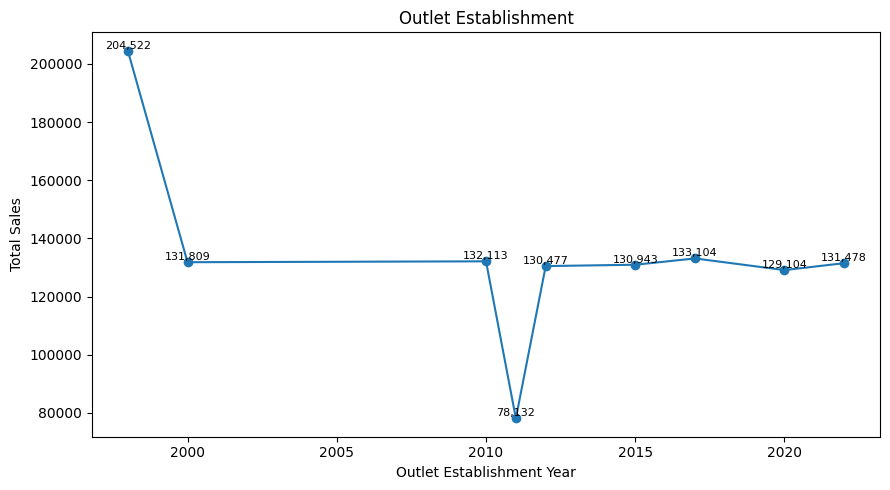

In [59]:
sales_by_year = df.groupby('outlet_establishment_year')['sales'].sum().sort_index()

plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### **Sales by Outlet Size**

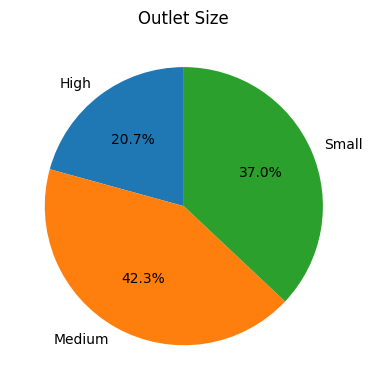

In [60]:
sales_by_size = df.groupby('outlet_size')['sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels = sales_by_size.index, autopct = '%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

### **Sales by Outlet Location**

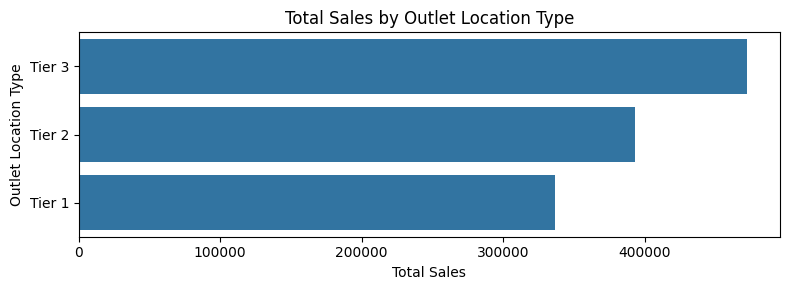

In [62]:
sales_by_location = df.groupby('outlet_location_type')['sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('sales', ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(x='sales', y='outlet_location_type', data = sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()